CRISP DM: Business Understanding
My primary goal is to determine if the number of languages known influences job satisfaction? 

Project Plan: 
-count number of langauges known per respondent
-create dataset containing language count, job satisfaction, and career satisfaction
-calcuate the average job satisfaction per respondent
-organize number of languages known by job satisfaction
-plot data in a visualization

I will know if my analysis is successful if ir provides insight into whether job satisfaction increases with the number of languages known. 

My data comes from the 2017 Stackoverflow Annual Developer Survey.

First, let's read in the data from the StackOverflow 2017 Survey. 

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df17 = pd.read_csv('./2017_SOF.csv', dtype=object) #read in data
df17.head() #display surface level view

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CRISP DM: Data Understanding
I have collected the data from the StackOverflow Survey. 

It is a large dataset with 154 columns and a mix of numerical and categorical data.

It contains the columns JobSatisfaction, CareerSatisfaction, and HaveWorkedLanguage (which contains a list of languages a respondent has worked with).

There is a significant amount of Nan and blank values in the JobSatisfaction, CareerSatisfaction, HaveWorkedLanguages columns, which need to be removed as they do not provide any value to my analysis. 

CRISP DM: Prepare Data
I will create a new dataframe containing the columns JobSatisfaction, CareerSatisfaction, and HaveWorkedLanguage. 

Then, clean up the data by removing any blank rows in the HaveWorkedLanguage and JobSatisfaction columns since they do not provide any useful data. 

To clean up this dataframe, I remove any rows containing Nan in the HaveWorkedLanguage and JobSatisfaction columns. 

Then construct new data by spliting the languages in the HaveWorkedLanguage column and counting the number of languages in each response. 

Now I format the data in the job_satisfaction dataframe by grouping JobSatisfaction and CareerSatisfaction by CountLanguage (the number of languages a respondent knows). 

In [3]:
df = df17[['HaveWorkedLanguage', 'JobSatisfaction','CareerSatisfaction']]
count_language = [len(str(x).split(';')) for x in df17['HaveWorkedLanguage'].tolist()]
df['countLanguage'] = count_language
df = df.dropna(subset = ['HaveWorkedLanguage', 'JobSatisfaction'], how = 'any')
df[['countLanguage', 'JobSatisfaction','CareerSatisfaction']] = df[['countLanguage', 'JobSatisfaction','CareerSatisfaction']].apply(pd.to_numeric)
job_satisfaction = df.groupby('JobSatisfaction')

# jobSatisfaction.index = jobSatisfaction.index.astype(int)
job_satisfaction.describe()
# df.head()

c:\users\marti\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


CareerSatisfaction                                            \
                             count      mean       std  min  25%   50%   75%   
JobSatisfaction                                                                
0                            321.0  3.663551  3.249838  0.0  0.0   3.0   7.0   
1                            265.0  4.086792  2.569492  0.0  2.0   4.0   6.0   
2                            662.0  5.092145  2.410698  0.0  3.0   5.0   7.0   
3                           1196.0  5.381271  2.102029  0.0  4.0   5.0   7.0   
4                           1356.0  6.005162  1.758682  0.0  5.0   6.0   7.0   
5                           2677.0  6.354501  1.652621  0.0  5.0   6.0   7.0   
6                           3503.0  6.903226  1.412819  0.0  6.0   7.0   8.0   
7                           6075.0  7.356379  1.229470  0.0  7.0   7.0   8.0   
8                           6908.0  7.890562  1.131134  0.0  7.0   8.0   8.0   
9                           4396.0  8.424477  1.060183  0.0  8.0   9.0   9.0   
10                          2969.0  9.328393  1.206845  0.0  9.0  10.0  10.0   

                      countLanguage                                          \
                  max         count      mean       std  min  25%  50%  75%   
JobSatisfaction                                                               
0                10.0         321.0  4.093458  3.475448  1.0  2.0  3.0  5.0   
1                10.0         265.0  3.837736  2.741393  1.0  2.0  3.0  5.0   
2                10.0         664.0  3.716867  2.361957  1.0  2.0  3.0  5.0   
3                10.0        1196.0  3.696488  2.082167  1.0  2.0  3.0  5.0   
4                10.0        1357.0  3.675755  2.055881  1.0  2.0  3.0  5.0   
5                10.0        2679.0  3.709220  2.176362  1.0  2.0  3.0  5.0   
6                10.0        3505.0  3.683024  2.081312  1.0  2.0  3.0  5.0   
7                10.0        6077.0  3.645549  2.090234  1.0  2.0  3.0  5.0   
8                10.0        6908.0  3.686885  2.074329  1.0  2.0  3.0  5.0   
9                10.0        4397.0  3.752559  2.131098  1.0  2.0  3.0  5.0   
10               10.0        2973.0  4.027245  2.459004  1.0  2.0  4.0  5.0   

                       
                  max  
JobSatisfaction        
0                35.0  
1                25.0  
2                21.0  
3                15.0  
4                17.0  
5                35.0  
6                22.0  
7                35.0  
8                21.0  
9                35.0  
10               34.0

CRISP DM: Prepare Data
I then organized the average Number of Languages Known by Job Satisfaction. 

In [6]:
js = df.groupby('JobSatisfaction').mean()['countLanguage'] #group data by jobsatisfaction
js #display data

JobSatisfaction
0     4.093458
1     3.837736
2     3.716867
3     3.696488
4     3.675755
5     3.709220
6     3.683024
7     3.645549
8     3.686885
9     3.752559
10    4.027245
Name: countLanguage, dtype: float64

CRISP DM: Modeling
I am using descriptive statistics to communicate my findings. Bar Charts are the most effective way to describe the average mean of a large group of data.   

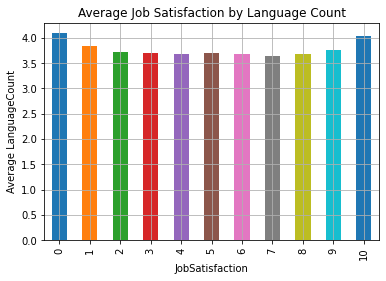

In [7]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] #select bar colors for barchart
(js).plot(kind = "bar", color = colors) #select type of chart
plt.title("Average Job Satisfaction by Language Count")
plt.ylabel("Average LanguageCount")
plt.grid()

You can see from the chart above that the difference between Languages Known did not vary greatly betweeen levels of job satsifacton. Those who knew the most languages were at the forefront and tail end of the dataset. There was a maximum difference of 0.19 between the mean of Languages Known in groups with Job Satisfaction 1-8. In addition there was no significant difference between standard deviations in Number of Languages Known. They mostly staggered around 2, therefore, there is not relationship between the number of Languages Known and Job Satisfaction. 

This point is further proved when grouping mean Job Satisfaction by Number of Languages Known.

In [8]:
x = df.groupby('countLanguage').mean()['JobSatisfaction']
js

JobSatisfaction
0     4.093458
1     3.837736
2     3.716867
3     3.696488
4     3.675755
5     3.709220
6     3.683024
7     3.645549
8     3.686885
9     3.752559
10    4.027245
Name: countLanguage, dtype: float64

The mean Job Satisfaction stays around 6 or 7 across the majority of respondents. 

In [9]:
x = df.groupby('countLanguage')
x.describe()

JobSatisfaction                                                 \
                        count       mean       std   min    25%   50%    75%   
countLanguage                                                                  
1                      3292.0   6.896416  2.166545   0.0   6.00   7.0   8.00   
2                      5741.0   6.960808  2.133693   0.0   6.00   7.0   8.00   
3                      7442.0   6.973260  2.095287   0.0   6.00   7.0   8.00   
4                      5460.0   7.041209  2.094477   0.0   6.00   7.0   9.00   
5                      3412.0   6.988570  2.124293   0.0   6.00   7.0   8.00   
6                      2079.0   7.026455  2.238385   0.0   6.00   7.0   9.00   
7                      1189.0   7.117746  2.167544   0.0   6.00   7.0   9.00   
8                       772.0   7.155440  2.177395   0.0   6.00   8.0   9.00   
9                       397.0   7.120907  2.321505   0.0   6.00   8.0   9.00   
10                      239.0   6.740586  2.353182   0.0   5.00   7.0   8.00   
11                      124.0   7.225806  2.148316   0.0   6.00   8.0   9.00   
12                       69.0   6.913043  2.305614   0.0   5.00   7.0   8.00   
13                       41.0   7.658537  2.220470   0.0   7.00   8.0   9.00   
14                       24.0   7.208333  2.501811   2.0   7.00   8.0   9.00   
15                       19.0   6.631579  2.671049   0.0   6.00   7.0   8.00   
16                       11.0   7.090909  3.207945   1.0   5.50   8.0   9.50   
17                        6.0   6.833333  2.228602   4.0   6.00   6.0   8.25   
18                        6.0   7.166667  2.316607   5.0   5.25   6.5   9.25   
19                        3.0   2.000000  2.645751   0.0   0.50   1.0   3.00   
20                        3.0   9.333333  1.154701   8.0   9.00  10.0  10.00   
21                        3.0   5.666667  3.214550   2.0   4.50   7.0   7.50   
22                        1.0   6.000000       NaN   6.0   6.00   6.0   6.00   
23                        2.0  10.000000  0.000000  10.0  10.00  10.0  10.00   
25                        1.0   1.000000       NaN   1.0   1.00   1.0   1.00   
34                        1.0  10.000000       NaN  10.0  10.00  10.0  10.00   
35                        5.0   4.200000  4.086563   0.0   0.00   5.0   7.00   

                    CareerSatisfaction                                         \
                max              count       mean       std   min   25%   50%   
countLanguage                                                                   
1              10.0             3290.0   7.299392  1.871527   0.0   6.0   8.0   
2              10.0             5738.0   7.395434  1.794854   0.0   7.0   8.0   
3              10.0             7438.0   7.405216  1.753947   0.0   7.0   8.0   
4              10.0             5460.0   7.475824  1.775750   0.0   7.0   8.0   
5              10.0             3412.0   7.417644  1.830221   0.0   7.0   8.0   
6              10.0             2075.0   7.546024  1.881027   0.0   7.0   8.0   
7              10.0             1189.0   7.571909  1.826918   0.0   7.0   8.0   
8              10.0              771.0   7.592737  1.873298   0.0   7.0   8.0   
9              10.0              397.0   7.501259  1.974106   0.0   7.0   8.0   
10             10.0              239.0   7.410042  1.987160   0.0   7.0   8.0   
11             10.0              124.0   7.508065  1.935950   2.0   7.0   8.0   
12             10.0               69.0   7.434783  2.131544   0.0   6.0   8.0   
13             10.0               41.0   7.853659  1.969276   0.0   7.0   8.0   
14             10.0               24.0   8.041667  1.334465   4.0   7.0   8.0   
15             10.0               19.0   7.894737  1.852768   2.0   7.0   8.0   
16             10.0               11.0   7.272727  1.555050   6.0   6.0   7.0   
17             10.0                6.0   8.000000  1.788854   6.0   6.5   8.0   
18             10.0                6.0   7.833333  1.471960   6.0   7.0  

If data is grouped by Career Satisfaction the same idea remains true. There is no relationship between the nubmer of langauges known and Career Satisfaction due to similar means and standard deviation. 

In [10]:
cs = df.groupby('CareerSatisfaction').mean()['countLanguage']
cs


CareerSatisfaction
0.0     4.496774
1.0     3.670213
2.0     3.701818
3.0     3.836449
4.0     3.527094
5.0     3.594319
6.0     3.617521
7.0     3.670748
8.0     3.712746
9.0     3.756023
10.0    4.005639
Name: countLanguage, dtype: float64

In [11]:
career_satisfaction = df.groupby('CareerSatisfaction')
career_satisfaction.describe()

JobSatisfaction                                            \
                             count      mean       std  min  25%   50%   75%   
CareerSatisfaction                                                             
0.0                          155.0  1.670968  2.723419  0.0  0.0   0.0   2.0   
1.0                           94.0  2.265957  2.286828  0.0  1.0   1.0   3.0   
2.0                          275.0  2.869091  2.199276  0.0  2.0   2.0   3.5   
3.0                          642.0  3.623053  2.110363  0.0  2.0   3.0   5.0   
4.0                          812.0  4.371921  1.926414  0.0  3.0   4.0   6.0   
5.0                         1866.0  5.039121  1.851620  0.0  4.0   5.0   6.0   
6.0                         3276.0  5.923687  1.720014  0.0  5.0   6.0   7.0   
7.0                         6861.0  6.736044  1.618001  0.0  6.0   7.0   8.0   
8.0                         8348.0  7.479157  1.520491  0.0  7.0   8.0   8.0   
9.0                         4275.0  8.163275  1.481443  0.0  8.0   9.0   9.0   
10.0                        3724.0  8.740870  1.830806  0.0  8.0  10.0  10.0   

                         countLanguage                                     \
                     max         count      mean       std  min  25%  50%   
CareerSatisfaction                                                          
0.0                 10.0         155.0  4.496774  4.240152  1.0  2.0  4.0   
1.0                 10.0          94.0  3.670213  3.421590  1.0  2.0  3.0   
2.0                 10.0         275.0  3.701818  2.459563  1.0  2.0  3.0   
3.0                 10.0         642.0  3.836449  2.210395  1.0  2.0  3.0   
4.0                 10.0         812.0  3.527094  1.945751  1.0  2.0  3.0   
5.0                 10.0        1866.0  3.594319  1.962367  1.0  2.0  3.0   
6.0                 10.0        3276.0  3.617521  2.148655  1.0  2.0  3.0   
7.0                 10.0        6861.0  3.670748  2.103212  1.0  2.0  3.0   
8.0                 10.0        8348.0  3.712746  2.105893  1.0  2.0  3.0   
9.0                 10.0        4275.0  3.756023  2.097670  1.0  2.0  3.0   
10.0                10.0        3724.0  4.005639  2.438218  1.0  2.0  4.0   

                               
                    75%   max  
CareerSatisfaction             
0.0                 6.0  35.0  
1.0                 5.0  25.0  
2.0                 5.0  21.0  
3.0                 5.0  13.0  
4.0                 5.0  14.0  
5.0                 5.0  13.0  
6.0                 5.0  35.0  
7.0                 5.0  35.0  
8.0                 5.0  22.0  
9.0                 5.0  20.0  
10.0                5.0  35.0

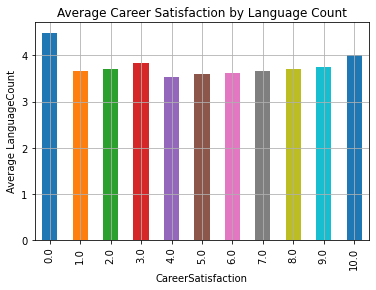

In [12]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
(cs).plot(kind = "bar", color = colors)
plt.title("Average Career Satisfaction by Language Count")
plt.ylabel("Average LanguageCount")
plt.grid()

CRISP DM: Evaluation of Results
Based on the chart above, those at the front and tail end of Career Satisfaction tend to know more languages. In addition, the means and standard deviations of Language Count stay within 1 unit of each other. Therefore there is no relatioship between Career Satisfaction and the Number of Languages Known. Career satisfaction does not rise significantly with the increase of Known Languages. No correlation can be concluded between the Number of Languages Known and Career Satisfaction or the Number of Languages Known and Job Satisfaction. 

The next steps are to proceed to deployment by publishing my findings to Medium.